In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('AirQuality_Clean_Normalized.csv', sep=';', decimal=',', encoding='utf-8',  index_col=0, parse_dates=True)

In [8]:
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
            CO(GT)      NO2(GT)
count  9357.000000  9357.000000
mean      0.172085     0.318438
std       0.121334     0.137462
min       0.000000     0.000000
25%       0.084746     0.218935
50%       0.144068     0.304490
75%       0.237288     0.397381
max       1.000000     1.000000


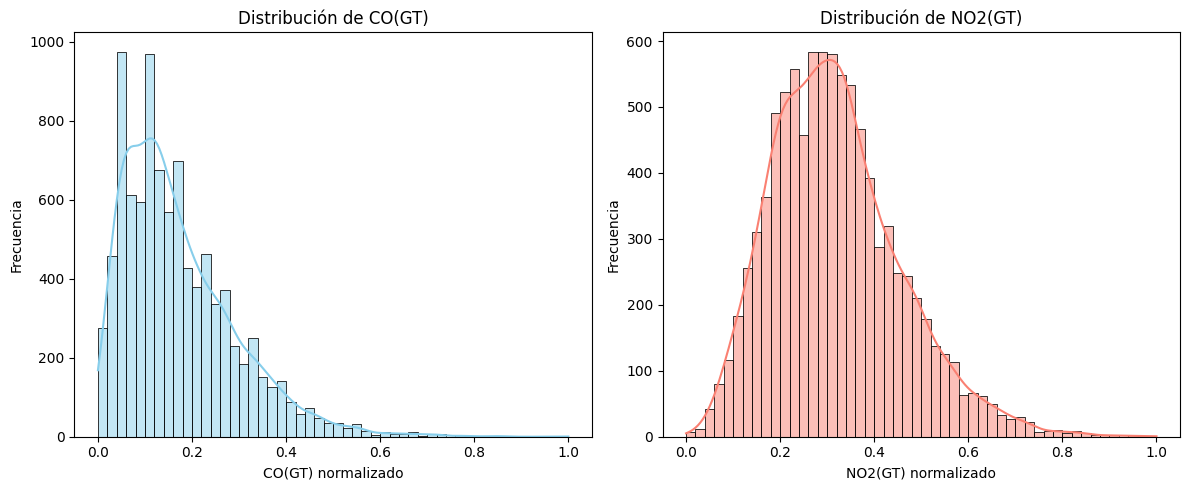

In [ ]:
# Histograma de CO y NO2
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['CO(GT)'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de CO(GT)')
plt.xlabel('CO(GT) normalizado')
plt.ylabel('Frecuencia')
plt.subplot(1,2,2)
sns.histplot(df['NO2(GT)'], bins=50, kde=True, color='salmon')
plt.title('Distribución de NO2(GT)')
plt.xlabel('NO2(GT) normalizado')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

<Figure size 1400x500 with 0 Axes>

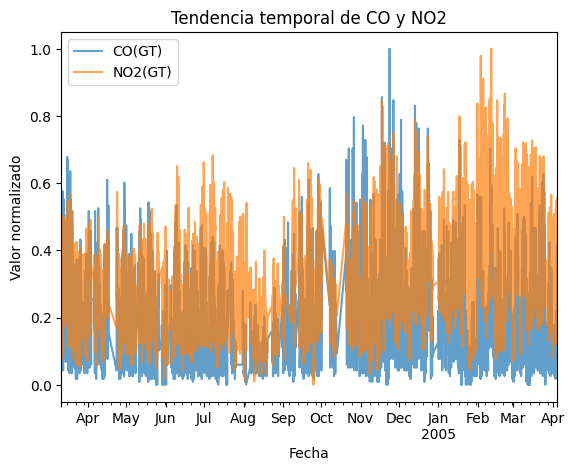

In [ ]:
# Tendencia temporal de CO y NO2
plt.figure(figsize=(14,5))
df[['CO(GT)', 'NO2(GT)']].plot(title='Tendencia temporal de CO y NO2', alpha=0.7)
plt.ylabel('Valor normalizado')
plt.xlabel('Fecha')
plt.show()


Matriz de correlación:
           CO(GT)   NO2(GT)
CO(GT)   1.000000  0.675804
NO2(GT)  0.675804  1.000000


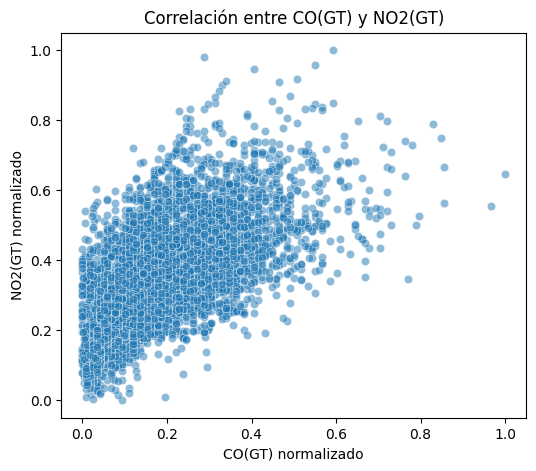

In [ ]:
# Correlación entre CO y NO2
correlation = df[['CO(GT)', 'NO2(GT)']].corr()
print("\nMatriz de correlación:")
print(correlation)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='CO(GT)', y='NO2(GT)', alpha=0.5)
plt.title('Correlación entre CO(GT) y NO2(GT)')
plt.xlabel('CO(GT) normalizado')
plt.ylabel('NO2(GT) normalizado')
plt.show()

In [ ]:
# Limpiar columnas
numeric_cols = ['CO(GT)', 'NO2(GT)']
df[numeric_cols] = df[numeric_cols].replace(-200, pd.NA)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Promedio diario
daily_mean = df[numeric_cols].resample('D').mean()

<Figure size 1400x500 with 0 Axes>

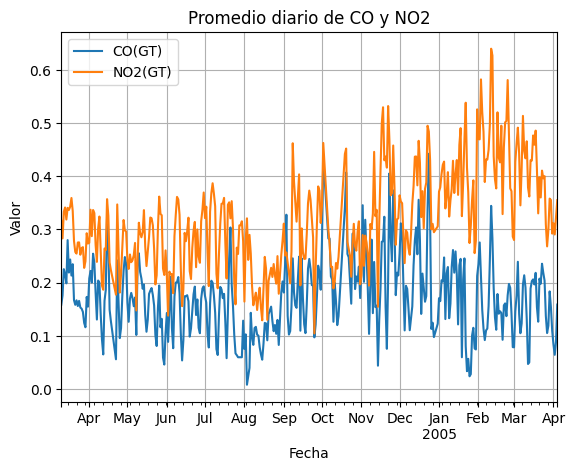

In [14]:
# Graficar
plt.figure(figsize=(14, 5))
daily_mean.plot(title='Promedio diario de CO y NO2')
plt.ylabel('Valor')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

In [15]:
# Promedio por hora del día de CO y NO2 (interactivo)

hourly_mean = df.groupby(df.index.hour).mean().reset_index()
fig = px.line(
    hourly_mean,
    x='datetime',  # Aquí datetime es la hora del día
    y=['CO(GT)','NO2(GT)'],
    title='Promedio por hora del día (interactivo)',
    labels={'value':'Valor normalizado', 'datetime':'Hora del día'},
    markers=True
)
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.show()